In [54]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 20]

In [2]:
fname = []
for j in range(3):
    fname.append('steinmetz_part%d.npz'%j)

alldat = np.array([])
for j in range(len(fname)):
    alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))


In [31]:
# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx. 
dat = alldat[11]

print(dat.keys())
print("Number of neurons: {}\nNumber of trials: {}\nNumber of timesteps: {}".format(*dat['spks'].shape))
print("Recorded brain areas:", *["{} ({}),".format(*elem) for elem in zip(*np.unique(dat['brain_area'], return_counts=True))])


dict_keys(['spks', 'wheel', 'pupil', 'lfp', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'brain_area_lfp', 'feedback_time', 'feedback_type', 'gocue', 'mouse_name', 'date_exp', 'trough_to_peak', 'waveform_w', 'waveform_u', 'active_trials', 'contrast_left_passive', 'contrast_right_passive', 'spks_passive', 'lfp_passive', 'pupil_passive', 'wheel_passive'])
Number of neurons: 698
Number of trials: 340
Number of timesteps: 250
Recorded brain areas: ACA (16), CA1 (50), DG (65), LGd (11), LH (18), MD (126), MOs (6), PL (56), SUB (105), VISam (79), VISp (66), root (100),


### Mean firing rate

In [73]:

def get_trials_per_outcome(reward):
    keep_trials = np.logical_or(dat['contrast_left'] != dat['contrast_right'],
                                             dat['contrast_left'] == 0)
    feedback_type = dat['feedback_type']
    
    if reward:
        return np.logical_and(keep_trials, feedback_type == 1)
    else:
        return np.logical_and(keep_trials, feedback_type == -1)

def plot_mean_spks(brain_area):
    neur_spks = dat['spks'][dat['brain_area'] == brain_area]
#     neur_spks = neur_spks_all[:,keep_trials]
#     feedback_type = dat['feedback_type'][keep_trials]

    neur_spks_reward = neur_spks[:,get_trials_per_outcome(True)]
    neur_spks_noise = neur_spks[:,get_trials_per_outcome(False)]
    
    mean_spks_reward = neur_spks_reward.mean(axis=(0,1))
    mean_spks_noise = neur_spks_noise.mean(axis=(0,1))

    dt = 0.01 # bin duration (ms)
    t = np.arange(len(mean_spks_reward))*dt
    t -= 0.5 # set timestep 0 to stimulus onset 

    plt.plot(t, mean_spks_reward, label="Reward")
    plt.plot(t, mean_spks_noise, label="Noise")

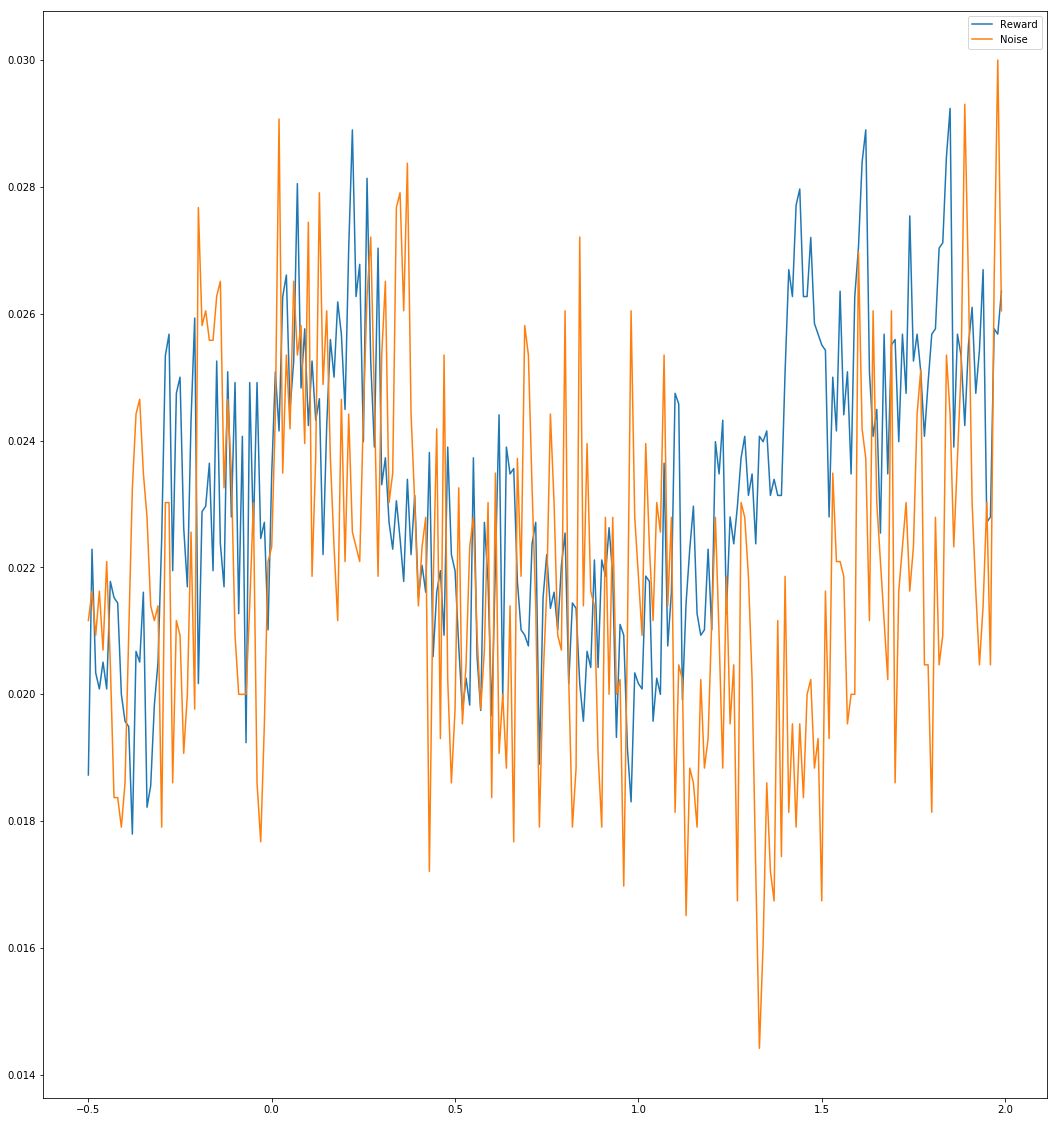

In [74]:
mean_spks_reward = neur_spks_reward.mean(axis=(0,1))
mean_spks_noise = neur_spks_noise.mean(axis=(0,1))

dt = 0.01 # bin duration (ms)
t = np.arange(len(mean_spks_reward))*dt
t -= 0.5 # set timestep 0 to stimulus onset 

plt.plot(t, mean_spks_reward, label="Reward")
plt.plot(t, mean_spks_noise, label="Noise")
plt.legend()
plt.show()

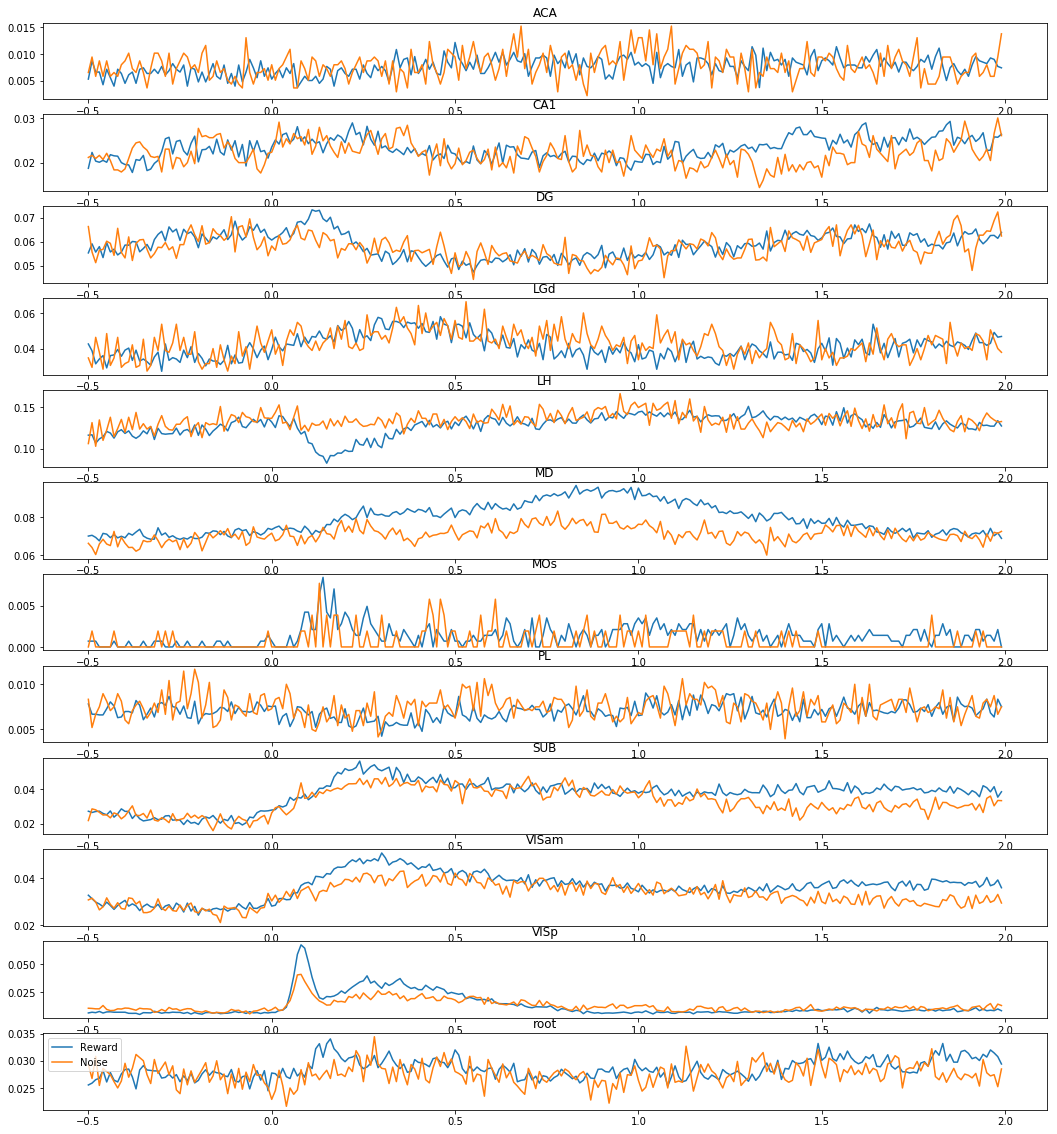

In [75]:
brain_areas = np.unique(dat['brain_area'])
for i, brain_area in enumerate(brain_areas):
    plt.subplot(len(brain_areas), 1, i+1)
    plot_mean_spks(brain_area)
    plt.title(brain_area)
plt.legend()
plt.show()

The white noise mean spiking seems to oscillate more but might be due to less white noise trials than for the reward trials. 
* Take a random subset to have the same number ?
* Select only difficult trials to have more or less the same number ?

In [83]:
print("Number of reward trials:", np.count_nonzero(get_trials_per_outcome(True)))
print("Number of white noise trials:", np.count_nonzero(get_trials_per_outcome(False)))

Number of reward trials: 236
Number of white noise trials: 86


### Pupil area

(250,)


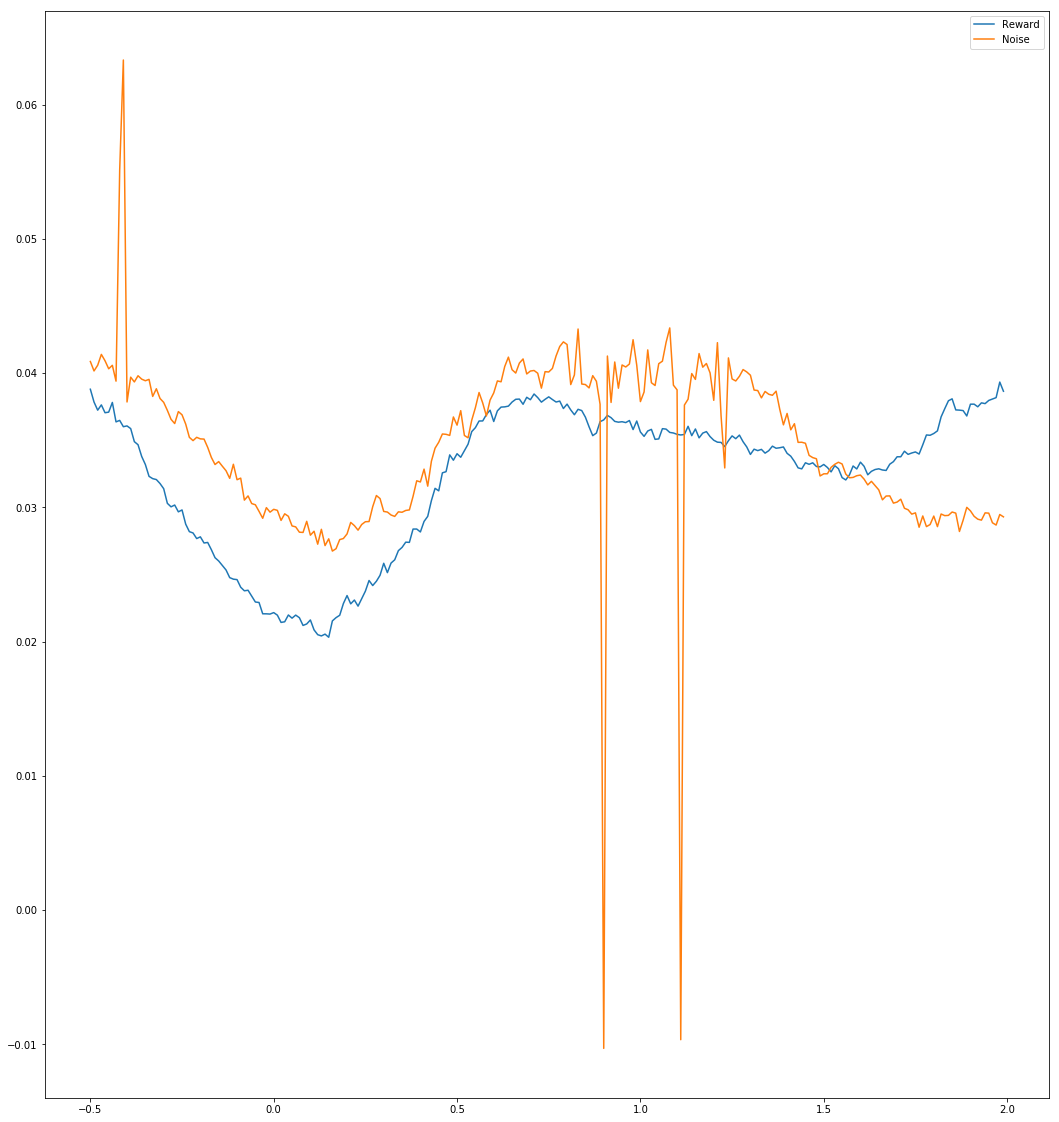

In [80]:
pupil_reward = dat['pupil'][0,get_trials_per_outcome(True)].mean(axis=0)
pupil_noise = dat['pupil'][0,get_trials_per_outcome(False)].mean(axis=0)

print(pupil_reward.shape)

dt = 0.01 # bin duration (ms)
t = np.arange(len(mean_spks_reward))*dt
t -= 0.5 # set timestep 0 to stimulus onset

plt.plot(t, pupil_reward, label="Reward")
plt.plot(t, pupil_noise, label="Noise")
plt.legend()
plt.show()

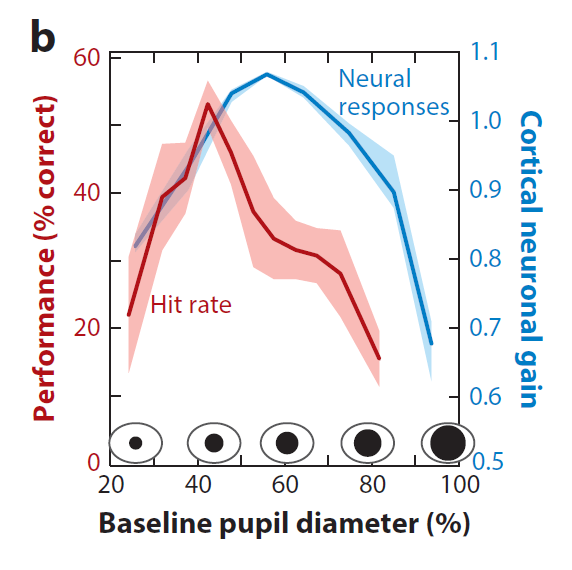

Pupil area measure of arousal but not of performance ?